In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
%cd /content/drive/MyDrive/Preprocessed
!ls

/content/drive/MyDrive/Preprocessed
'African Jambo'   Fazlee	      Maryam
 Aprupali	 'Gopal Vog'	      Modhurani
'Baper Bari'	  Haribhanga	     'Phillipine Honey Dew'
'Bari 11'	 'Him Sagor'	      Qzai
'Bari 13'	  image_data_pp.npy  'Red Palmar'
'Bari 4'	 'Indian Totapori'    Sabira
'Bari 7'	 'Kacha Mitha'	     'Taiwani Red'
'Bari 8'	 'King Breunei'      'Thai Banana Mango'
'Bari 9'	  Lengra	     'Thai Moryam'


In [13]:
listOfProjati = []
ProjatiDirectory = {}
import os
path = os.getcwd()
for dir in os.listdir(path):
  if os.path.isdir(dir):
    if str(dir) != "thai banana mango (renamed)" and str(dir) != "Jubair":
      listOfProjati.append(str(dir))
      ProjatiDirectory[str(dir)] = '/' + str(dir)
ProjatiDirectory

{'Lengra': '/Lengra',
 'Fazlee': '/Fazlee',
 'Haribhanga': '/Haribhanga',
 'Thai Banana Mango': '/Thai Banana Mango',
 'Bari 7': '/Bari 7',
 'Bari 11': '/Bari 11',
 'Bari 4': '/Bari 4',
 'Bari 8': '/Bari 8',
 'African Jambo': '/African Jambo',
 'Sabira': '/Sabira',
 'Phillipine Honey Dew': '/Phillipine Honey Dew',
 'Maryam': '/Maryam',
 'Indian Totapori': '/Indian Totapori',
 'Kacha Mitha': '/Kacha Mitha',
 'Thai Moryam': '/Thai Moryam',
 'Modhurani': '/Modhurani',
 'Baper Bari': '/Baper Bari',
 'Red Palmar': '/Red Palmar',
 'King Breunei': '/King Breunei',
 'Taiwani Red': '/Taiwani Red',
 'Qzai': '/Qzai',
 'Him Sagor': '/Him Sagor',
 'Gopal Vog': '/Gopal Vog',
 'Bari 13': '/Bari 13',
 'Aprupali': '/Aprupali',
 'Bari 9': '/Bari 9'}

In [14]:
countDict = {}
for projati in listOfProjati:
  subfolderPath = path + ProjatiDirectory[projati]
  c = 0
  for file in os.listdir(subfolderPath):
    if file.endswith('.jpg') or file.endswith('.JPG') or file.endswith('.jpeg') or file.endswith('.JPEG')  or file.endswith('.PNG') or file.endswith('.png'):
      # file_name, file_extension = os.path.splitext(file)
      c += 1
  countDict[projati] = c
countDict

{'Lengra': 366,
 'Fazlee': 600,
 'Haribhanga': 600,
 'Thai Banana Mango': 612,
 'Bari 7': 600,
 'Bari 11': 600,
 'Bari 4': 600,
 'Bari 8': 600,
 'African Jambo': 600,
 'Sabira': 624,
 'Phillipine Honey Dew': 708,
 'Maryam': 1044,
 'Indian Totapori': 726,
 'Kacha Mitha': 846,
 'Thai Moryam': 882,
 'Modhurani': 600,
 'Baper Bari': 600,
 'Red Palmar': 414,
 'King Breunei': 612,
 'Taiwani Red': 354,
 'Qzai': 810,
 'Him Sagor': 438,
 'Gopal Vog': 600,
 'Bari 13': 510,
 'Aprupali': 600,
 'Bari 9': 600}

In [21]:
img_data = np.array(img_data_array)

<ipython-input-21-f0493e41d889>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  img_data = np.array(img_data_array)


In [16]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.models import Sequential, Model
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
import random
%matplotlib inline

In [23]:
%cd /content/drive/MyDrive/Preprocessed
!ls

/content/drive/MyDrive/Preprocessed
'African Jambo'   Fazlee	      Maryam
 Aprupali	 'Gopal Vog'	      Modhurani
'Baper Bari'	  Haribhanga	     'Phillipine Honey Dew'
'Bari 11'	 'Him Sagor'	      Qzai
'Bari 13'	  image_data_pp.npy  'Red Palmar'
'Bari 4'	 'Indian Totapori'    Sabira
'Bari 7'	 'Kacha Mitha'	     'Taiwani Red'
'Bari 8'	 'King Breunei'      'Thai Banana Mango'
'Bari 9'	  Lengra	     'Thai Moryam'


In [24]:
img_data=np.load('image_data_pp.npy')
img_data

array([[[[0.64705884, 0.6431373 , 0.654902  ],
         [0.64705884, 0.6431373 , 0.65882355],
         [0.64705884, 0.6431373 , 0.65882355],
         ...,
         [0.7921569 , 0.8156863 , 0.80784315],
         [0.79607844, 0.8117647 , 0.80784315],
         [0.8       , 0.8117647 , 0.8117647 ]],

        [[0.6431373 , 0.6392157 , 0.64705884],
         [0.6431373 , 0.6392157 , 0.654902  ],
         [0.6431373 , 0.6392157 , 0.654902  ],
         ...,
         [0.8       , 0.8117647 , 0.80784315],
         [0.8039216 , 0.8117647 , 0.80784315],
         [0.8039216 , 0.8117647 , 0.8117647 ]],

        [[0.6431373 , 0.6392157 , 0.6509804 ],
         [0.64705884, 0.6431373 , 0.654902  ],
         [0.6431373 , 0.6392157 , 0.654902  ],
         ...,
         [0.8       , 0.8117647 , 0.8039216 ],
         [0.8039216 , 0.8156863 , 0.80784315],
         [0.8       , 0.8117647 , 0.80784315]],

        ...,

        [[0.7882353 , 0.78039217, 0.78039217],
         [0.7921569 , 0.78431374, 0.78431374]

In [25]:
import gc
gc.collect()

65

In [26]:
listOfProjatiCopy = listOfProjati.copy()
listOfProjatiCopy

['Lengra',
 'Fazlee',
 'Haribhanga',
 'Thai Banana Mango',
 'Bari 7',
 'Bari 11',
 'Bari 4',
 'Bari 8',
 'African Jambo',
 'Sabira',
 'Phillipine Honey Dew',
 'Maryam',
 'Indian Totapori',
 'Kacha Mitha',
 'Thai Moryam',
 'Modhurani',
 'Baper Bari',
 'Red Palmar',
 'King Breunei',
 'Taiwani Red',
 'Qzai',
 'Him Sagor',
 'Gopal Vog',
 'Bari 13',
 'Aprupali',
 'Bari 9']

In [27]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(listOfProjatiCopy)
listOfProjatiCopy = le.transform(listOfProjatiCopy)
listOfProjatiCopy

array([16,  9, 11, 24,  6,  3,  5,  7,  0, 22, 19, 17, 13, 14, 25, 18,  2,
       21, 15, 23, 20, 12, 10,  4,  1,  8])

In [28]:
target_val = []
for i in range(len(listOfProjati)):
  tempList = [listOfProjatiCopy[i]]*countDict[listOfProjati[i]]
  target_val.extend(tempList)
target_val = np.array(target_val)
target_val

array([16, 16, 16, ...,  8,  8,  8])

In [29]:
from sklearn.model_selection import train_test_split
x, x_test, y, y_test = train_test_split(img_data,target_val,test_size=0.3, stratify=target_val)
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.2, stratify=y)

In [30]:
print((x_train.shape,y_train.shape))
print((x_test.shape,y_test.shape))
print((x_val.shape,y_val.shape))

((9041, 128, 128, 3), (9041,))
((4844, 128, 128, 3), (4844,))
((2261, 128, 128, 3), (2261,))


In [31]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_val=to_categorical(y_val)
y_test=to_categorical(y_test)

In [32]:
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x_test.shape,y_test.shape))

((9041, 128, 128, 3), (9041, 26))
((2261, 128, 128, 3), (2261, 26))
((4844, 128, 128, 3), (4844, 26))


In [33]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator()
val_generator = ImageDataGenerator()
test_generator = ImageDataGenerator()
train_generator.fit(x_train)
val_generator.fit(x_val)
test_generator.fit(x_test)

In [34]:
# import seaborn as sns
import itertools
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten, Dense, BatchNormalization, Activation,Dropout

In [35]:
inc =InceptionV3(include_top=False, weights='imagenet', input_shape=(128,128,3), classes=y_train.shape[1])

87910968/87910968 [==============================] - 1s 0us/step


In [36]:
model_inc = Sequential()
model_inc.add(inc)
model_inc.add(Flatten())
# model_inc.add(Dense(1024,activation=('relu'),input_dim=512))
# model_inc.add(Dense(512,activation=('relu')))
# model_inc.add(Dense(256,activation=('relu')))
# model_inc.add(Dropout(.3))
# model_inc.add(Dense(128,activation=('relu')))
# model_inc.add(Dropout(.2))
model_inc.add(Dense(26,activation=('softmax')))

In [37]:
batch_size= 32
epochs=2
learning_rate=.001
sgd=SGD(learning_rate,momentum=.9,nesterov=False)

In [38]:
model_inc.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
lrr= ReduceLROnPlateau(monitor='val_accuracy', factor=.01,  patience=3, min_lr=1e-5)

In [ ]:
hist = model_inc.fit(train_generator.flow(x_train, y_train, batch_size = batch_size), epochs=epochs, steps_per_epoch = x_train.shape[0]//batch_size, validation_data = val_generator.flow(x_val, y_val, batch_size = batch_size), callbacks = [lrr], verbose = 1)

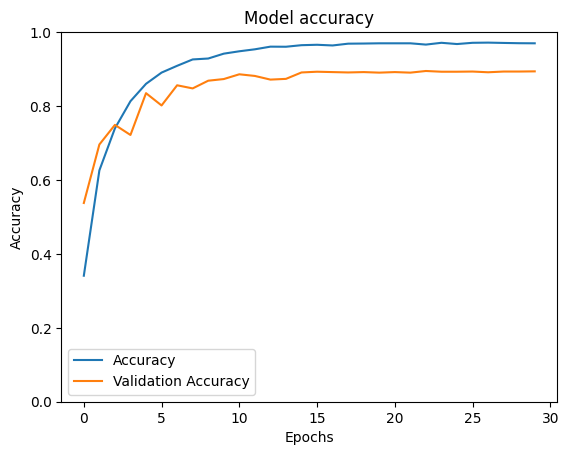

In [ ]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.ylim(0,1)
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

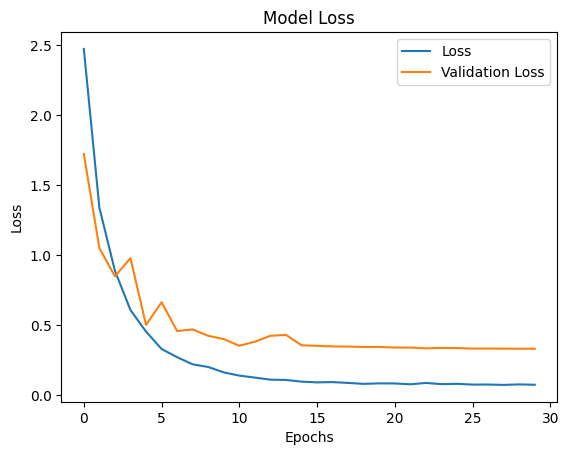

In [ ]:
plt.plot(hist.history["loss"])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Loss","Validation Loss"])
plt.show()

In [ ]:
y_pred1 = model_inc.predict(x_test)
y_true = np.argmax(y_pred1,axis=1)
y_demo = np.argmax(y_test,axis=1)

136/136 [==============================] - 4s 18ms/step


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_demo)

0.8840546169868087

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_true, y_demo, average='weighted')

0.8826279482909338

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_true,y_demo,average='weighted')

0.8840546169868087

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_true,y_demo,average='weighted')

0.8828515117968099

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_demo)